In [94]:
# import numpy as np
# from tensorflow.keras.models import load_model
# import joblib

# model = load_model("pressure_ID_Fan_inlet_DL(1).h5")

# x = np.array(['0.1895255', '81.64461', '945', '0.4215', '75.01871']).astype(float)
# # 8.697917	-97.22223	73.85452	42.3	42	846.6	157.2195	440.6703	107.7635

# # 0.1895255	5.027527	81.64461	54.8	46	43.94352	0.4215	75.01871	4.6365

# # y = -400.0651

# scaler = joblib.load("scaler(1).pkl")

# x_scaled = scaler.transform(x.reshape(1, -1))

# pred = model.predict(x_scaled)

# print("Predicted value:", pred)


In [95]:
import numpy as np
from tensorflow.keras.models import load_model
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

model = load_model("pressure_ID_Fan_inlet_DL(7).h5")

In [96]:
df = pd.read_csv('Batch-1.1.csv')
df1 = pd.read_csv('Batch-1.1.csv')
df.head()

,SampleTime,Process Mode,Oxygen Consumption -Top,Furnace Power,CombustionChamber Pressure,Suction Damper Position feedback,FDC inlet Temprature,FDC Outlet Temp,FDC Outlet Temp - Upperside,DP across FDC,...,DP Across baghouse - UpperSide,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,Unnamed: 19,Unnamed: 20,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed,ID Fan2 Current
0,02.09.2024_12.30.09,128,1887.744,0.0,-11.65726,58.70226,274.2838,135.1,129.7,55.91363,...,14.93200,17.62587,-386.0677,66.30715,42.5,69.8,946.2,228.6638,945.4032,234.5647
1,02.09.2024_12.35.09,32,2890.050,0.0,-13.97569,92.22367,400.8029,168.8,162.6,103.37820,...,15.85503,18.51997,-400.0651,60.93208,41.2,80.7,946.2,226.4158,945.4032,214.6138
2,02.09.2024_12.40.10,32,3892.103,0.0,-13.86719,92.22367,466.3701,191.8,186.5,50.24234,...,16.05035,18.84115,-397.2801,60.93605,43.7,86.0,946.2,221.4280,945.4032,215.8080
3,02.09.2024_12.45.09,32,4897.067,0.0,-13.58145,92.22729,492.1911,190.5,186.6,85.76027,...,16.11979,18.69213,-391.2399,60.93605,43.1,85.6,946.2,221.3578,945.4032,219.4610
4,02.09.2024_12.50.09,32,5902.126,0.0,-13.96846,92.23814,492.8675,184.3,181.5,67.95067,...,15.93750,18.62558,-390.9505,60.93208,42.2,85.1,946.2,222.6222,945.4032,220.1635


In [97]:
df = df[(df['Process Mode']==128) | (df['Process Mode']==16) | (df['Process Mode']==32) | (df['Process Mode']==64) | (df['Process Mode']==2048)]
df1 = df[(df['Process Mode']==128) | (df['Process Mode']==16) | (df['Process Mode']==32) | (df['Process Mode']==64) | (df['Process Mode']==2048)]
df.shape

(758, 25)

In [98]:
df = df.iloc[:,16:24]
df.drop(columns=['Unnamed: 19','Unnamed: 20'],inplace=True)
df.head()

,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed
0,17.62587,-386.0677,66.30715,946.2,228.6638,945.4032
1,18.51997,-400.0651,60.93208,946.2,226.4158,945.4032
2,18.84115,-397.2801,60.93605,946.2,221.4280,945.4032
3,18.69213,-391.2399,60.93605,946.2,221.3578,945.4032
4,18.62558,-390.9505,60.93208,946.2,222.6222,945.4032


In [99]:
hi = df[(df['ID Fan1 Speed']>900) & (df['ID Fan1 Speed']<943)]
hi

,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed


In [100]:
print(df.isna().sum())
df.dropna(inplace=True)

DP Across baghouse - LowerSide    0
Pressure ID Fan Inlet             0
Canopy Damper Position            0
ID Fan1 Speed                     0
ID Fan1 Current                   0
ID Fan2 Speed                     0
dtype: int64


In [101]:
x = df.drop('Pressure ID Fan Inlet',axis = 1)
y = df['Pressure ID Fan Inlet']

In [102]:
x = np.array(x)

In [103]:
x

array([[ 17.62587,  66.30715, 946.2    , 228.6638 , 945.4032 ],
       [ 18.51997,  60.93208, 946.2    , 226.4158 , 945.4032 ],
       [ 18.84115,  60.93605, 946.2    , 221.428  , 945.4032 ],
       ...,
       [ 17.33652,  65.75412, 946.2    , 227.4695 , 945.4032 ],
       [ 17.2555 ,  65.75412, 946.2    , 227.7505 , 945.4032 ],
       [ 17.56655,  65.75412, 946.2    , 226.8372 , 945.4032 ]])

In [104]:
sc = joblib.load("scaler(7).pkl")
x_scaled = sc.transform(x)

c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [105]:
pred = model.predict(x_scaled)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [106]:
see = pd.DataFrame()
see['y'] = y
see['pred'] = pred.flatten()



In [107]:
see.head(700)

,y,pred
0,-386.0677,-390.423859
1,-400.0651,-405.009369
2,-397.2801,-403.466827
3,-391.2399,-402.850891
4,-390.9505,-403.306305
...,...,...
999,-379.4126,-382.487579
1000,-386.7188,-382.421844
1001,-390.5526,-382.342926
1006,-375.9766,-389.541229


In [108]:
from sklearn.metrics import mean_squared_error
mape = np.mean(np.abs((y - pred.flatten()) / y)) * 100
print(mape)
rmse = np.sqrt(mean_squared_error(y, pred.flatten()))
print(rmse)


r2_score(y,pred.flatten())

2.519128523199287
29.02578402129727


-2.6663258163708505

In [116]:
df1[diff.flatten() > 20]

,SampleTime,Process Mode,Oxygen Consumption -Top,Furnace Power,CombustionChamber Pressure,Suction Damper Position feedback,FDC inlet Temprature,FDC Outlet Temp,FDC Outlet Temp - Upperside,DP across FDC,...,DP Across baghouse - UpperSide,DP Across baghouse - LowerSide,Pressure ID Fan Inlet,Canopy Damper Position,Unnamed: 19,Unnamed: 20,ID Fan1 Speed,ID Fan1 Current,ID Fan2 Speed,ID Fan2 Current
219,03.09.2024_06.45.09,128,1305.376,0.0,-9.895828,39.72439,164.1963,81.5,77.0,51.07422,...,14.49508,17.57813,-417.9688,64.97830,36.5,50.4,946.2,236.0400,945.4032,233.8622
220,03.09.2024_06.50.09,32,2300.813,0.0,-13.632090,58.77098,287.5723,125.0,116.9,85.33710,...,15.03761,17.81395,-425.3110,60.65755,36.8,62.9,946.2,227.5397,945.4032,234.5647


In [110]:
pred = pred.reshape(1,-1)

In [111]:
diff = pred - (np.array(y)).reshape(1,-1)
diff_series = pd.Series(diff.flatten)
diff_df = pd.DataFrame(diff)
diff_np = np.array(diff)


In [112]:
diff.mean()

np.float64(-4.130024403601171)

In [113]:

print(df.iloc[161])
print(df.iloc[162])
# print(df.iloc[163])

DP Across baghouse - LowerSide     17.07031
Pressure ID Fan Inlet            -414.67740
Canopy Damper Position             64.97830
ID Fan1 Speed                     946.20000
ID Fan1 Current                   236.88300
ID Fan2 Speed                     945.40320
Name: 218, dtype: float64
DP Across baghouse - LowerSide     17.57813
Pressure ID Fan Inlet            -417.96880
Canopy Damper Position             64.97830
ID Fan1 Speed                     946.20000
ID Fan1 Current                   236.04000
ID Fan2 Speed                     945.40320
Name: 219, dtype: float64


In [114]:
print(diff[diff>20])
print(np.where(diff>20))

[20.56374019 21.77672876]
(array([0, 0]), array([162, 163]))


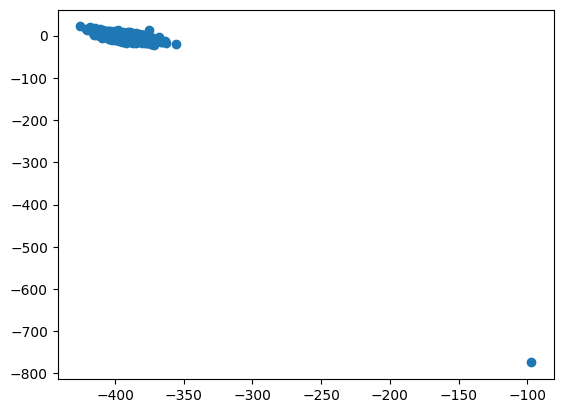

In [115]:
plt.scatter(y,diff)